# 9. MÁQUINAS DE VETORES DE SUPORTE

Neste capítulo, discutimos a <i> máquina de vetor de suporte</i> (SVM), uma abordagem para classificação que foi desenvolvida na comunidade da ciência da computação nos anos 90 e que teve sua popularidade aumentada desde então. SVMs mostraram ter boa performance em uma variedade de contextos, e são frequentemente consideradas uns dos melhores classificadores não-convencionais.
<br></br>
<br></br>
A máquina de vetor de suporte é uma generalização de um classificador simples e intuitivo chamado o <i>classificador de margem máxima</i>, o qual introduzimos na seção 9.1. Apesar de ser elegante e simples, vemos que este classificador infelizmente não pode ser aplicado à maioria dos conjuntos de dados, já que este requer que as classes sejam separadas por uma fronteira linear. Na seção 9.2, introduzimos o <i>classificador de vetor de suporte</i>, uma extensão do classificador de margem máxima que pode ser aplicado a um espectro mais amplo de casos. A seção 9.3 introduz a <i>máquina de vetor de suporte</i>, que é uma extensão maior do classificador de vetor de suporte que acomoda fronteiras de classes não-lineares. Máquinas de vetores de suporte são projetadas para o contexto de classificação binária no qual há duas classes; na seção 9.4 discutimos extensões das máquinas de vetores de suporte para o caso em que há mais de duas classes. Na seção 9.5 discutimos as conexões próximas entre máquinas de vetores de suporte e outros métodos estatísticos como regressão logística.
<br></br>
<br></br>
Geralmente, as pessoas se referem ao classificador de margem máxima, o classificador de vetor de suporte e a máquina de vetor de suporte como "máquina de vetores de suporte". Para evitar confusão, distinguiremos cuidadosamente estas três noções neste capítulo.

# 9.1 Classificador de margem máxima

Nesta seção, definimos um hiperplano e introduzimos o conceito de um hiperplano de separação ótima.

## 9.1.1 O que é um hiperplano?

Em um espaco $p$-dimensional, um *hiperplano* é um subespaço plano afim de dimensão $p-1$. Por exemplo, em duas dimensões, um hiperplano é um subespaço sem curvas unidimensional - em outras palavras, uma linha. Em três dimensões, um hiperplano é um subespaço sem curvas bidimensional - ou seja, um plano. Em dimensões $p>3$, pode ser difícil de visualizar um hipeplano, mas a noção de um subespaço sem curvas $(p-1)$-dimensional ainda se aplica.

A definição matemática de um hiperplano é simples. Em duas dimensões, um hiperplano é definido pela equação


<h4 align="center">$β_{0}$ + $β_{1}$$X_{1}$ + $β_{2}$$X_{2}$ $=$ $0$ </h4> <h4 align="right"> $(9.1)$ </h4>


para parâmetros $β_{0}$, $β_{1}$ e $β_{2}$. Quando dizemos que (9.1) "define" o hiperplano, queremos fizer que qualquer $X$ = $(X_{1},X_{2})^{T}$ que (9.1) considera é um ponto no hiperplano. Note que (9.1) é simplesmente a equação de uma linha, já que, de fato, em duas dimensões, um hiperplano é uma linha.

A equação 9.1 pode ser facilmente extendida para um contexto $p-$dimensional:

<h4 align="center">$β_{0}$ + $β_{1}$$X_{1}$ + $β_{2}$$X_{2}$ $+...+$ $β_{p}$$X_{p}$ $=$ $0$ </h4> <h4 align="right"> $(9.2)$ </h4>

definindo um hiperplano $p-$dimensional, novamente no sentido de que se um ponto $X$ = $(X_{1},X_{2},...,X_{p})^{T}$ em um espaço $p-$dimensional (por exemplo, um vetor de comprimento $p$) satisfaz (9.2), então $X$ posiciona-se no hiperplano.

Agora, suponha que $X$ não satisfaz (9.2):

<h4 align="center">$β_{0}$ + $β_{1}$$X_{1}$ + $β_{2}$$X_{2}$ $+...+$ $β_{p}$$X_{p}$ $>$ $0$ </h4> <h4 align="right"> $(9.3)$ </h4>

Então, isto nos diz que $X$ posiciona-se em um lado do hiperplano. Por outro lado, se 

<h4 align="center">$β_{0}$ + $β_{1}$$X_{1}$ + $β_{2}$$X_{2}$ $+...+$ $β_{p}$$X_{p}$ $<$ $0$ </h4> <h4 align="right"> $(9.4)$ </h4>

Então $X$ se encontra no outro lado do hiperplano. 

Daí, podemos pensar no hiperplano como um divisor de um espaço $p-$dimensional em duas metades. Pode-se facilmente determinar de que lado do hiperplano um ponto se encontra ao calcular o sinal do lado esquerdo de (9.2). Um hiperplano em um espaço bidimensional é mostrado na figura 9.1.

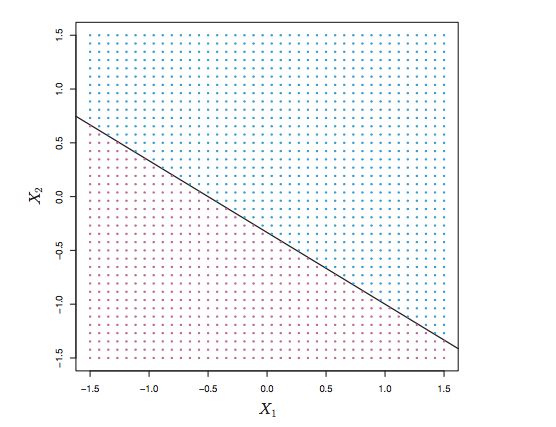
**<h4>FIGURA 9.1.</h4>** *O hiperplano $1$ + $2X_{1}$ + $3X_{2}$ é mostrado. A região azul é o conjunto de pontos para qual $1$ + $2X_{1}$ + $3X_{2}$ $>$ $0$, e a região roxa é o conjunto de pontos para qual $2X_{1}$ + $3X_{2}$ $<$ $0$.*

## 9.1.2. Classificação utilizando um hiperplano separador

Agora suponha que temos uma matriz $n×p$ de dados $X$ que consiste de $n$ observações de treino em um espaço $p-$dimensional, 

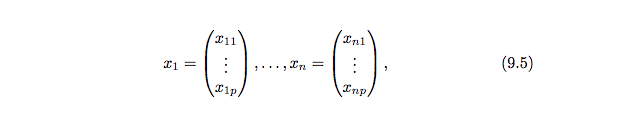

e que essas observações caem em duas classes - isto é, $y_{1},...,y_{n}$ $∈${-1,1} onde -1 representa uma classe e 1 a outra classe. Também temos uma observação de teste, um $p-$vetor de características observadas $x^{*}$ = $(x_{1}^{*}     ...  x_{p}^{*})^{T}$. Nosso objetivo é desenvolver um classificador baseado nos dados de treino que irão classificar corretamente a observação de teste utilizando suas medidas características. Vimos um número de abordagens para esta tarefa, tal como análise discriminante linear e regressão logística no Capítulo 4, e árvores de classificação, bagging e boosting no Capítulo 8. Agora, veremos uma nova abordagem que é baseada no conceito de um $hiperplano$ $separador$. 

Suponha que é possível construir um hiperplano que separa as observações de treino perfeitamente de acordo com as suas legendas de classe. Exemplos de tais $hiperplanos$ $separadores$ são mostrados no painel à esquerda da Figura 9.2. Podemos rotular as observações da classe azul como $y_{i}=1$ e as da classe roxa como $y_{i} = -1$. Então, um hiperplano separador possui a propriedade que 

<h4 align="center">$β_{0}$ + $β_{1}$$X_{i1}$ + $β_{2}$$X_{i2}$ $+...+$ $β_{p}$$X_{ip}$ $>$ $0$ $se$ $y_{i}=1$ </h4> <h4 align="right"> $(9.6)$ </h4>

e

<h4 align="center">$β_{0}$ + $β_{1}$$X_{i1}$ + $β_{2}$$X_{i2}$ $+...+$ $β_{p}$$X_{ip}$ $<$ $0$ $se$ $y_{i}=-1$ </h4> <h4 align="right"> $(9.7)$ </h4>

Equivalentemente, um hiperplano separador possui a propriedade de que

<h4 align="center"> $y_{i}$($β_{0}$ + $β_{1}$$X_{i1}$ + $β_{2}$$X_{i2}$ $+...+$ $β_{p}$$X_{ip}$) $>$ $0$ $se$ $y_{i}=1$ </h4> <h4 align="right"> $(9.8)$ </h4>

para todo $i$ = $1,...,n$.

Se um hiperplano separador existe, podemos utilizá-lo para construir um classificador muito natural: uma observação de teste é atribuída a uma classe dependendo de qual lado do hiperplano está localizado. O painel direito da figura 9.2 mostra um exemplo de tal classificador. Isto é, classificamos a observação de teste $x^{*}$ beaseado no sinal de $f(x^{*})$ = $β_{0}$ + $β_{1}$$x_{1}^{*}$ + $β_{2}$$x_{2}^{*}$ + ... +  $β_{p}$$x_{p}^{*}$. Se $f(x^{*})$ for positiva, então atribuímos a observação de teste para a classe 1, e se $f(x^{*})$ for negativa, então a atribuímos para a classe -1. Podemos também fazer uso da $magnitude$ de $f(x^{*})$. Se $f(x^{*})$ estiver longe de zero, isto significa que $x^{*}$ encontra-se longe do hiperplano, então podemos ter confiança sobre nossa atribuição de classe para $x^{*}$. Por outro lado, se $f(x^{*})$ estiver mais próximo de zero, então $x^{*}$ é localizado próximo ao hiperplano, e então ficamos menos certos sobre a atribuição de classe para $x^{*}$. Como vimos na Figura 9.2, um classificador que é baseado em um hiperplano separador leva a uma fronteira de decisão linear.

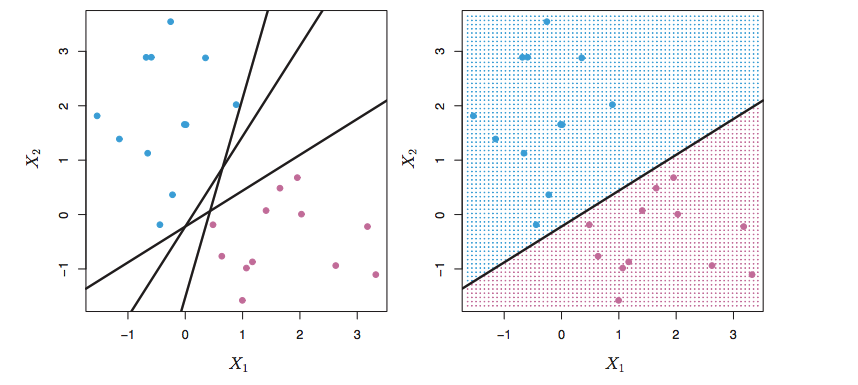
**<h4>FIGURA 9.2.</h4>** Esquerda: *Há duas classes de observações, mostradas em azul e em roxo, cada qual possuindo medidas em duas variáveis. Três hiperplanos separadores (uns dos muitos possíveis), são mostrados em preto.* Direita: *Um hiperplano separador é mostrado em preto. A grade azul e roxa indica a regra de decisão feita por um classificador baseado neste hiperplano separador: uma observação de teste que cai na porção azul da grade será atribuída à classe azul, e uma observação de teste que cai na porção roxa da grade será atribuída à classe roxa.*

## 9.1.3. O classificador de margem máxima

Em geral, se nossos dados podem ser perfeitamente separados utilizando um hiperplano, então haverá de fato um número infinito de tais hiperplanos. Isto ocorre porque, dado um hiperplano separador, este pode ser geralmente deslocado um pouco para cima ou para baixo ou rotacionado, sem entrar em contato com nenhuma das observações. Três hiperplanos separadores possíveis estão mostrados no painel à esquerda da Figura 9.2. Para construir um classificador baseado em um hiperplano separador, devemos ter uma forma razoável para decidir quais dos infinitos hiperplanos separadores possíveis usaremos.

Uma escolha natural é o hiperplano de margem máxima (também conhecido como o hiperplano de separação ótima), o qual é o hiperplano separador mais distante das observações de treino. Isto é, podemos computar a distância (perpendicular) de cada observação de treino para um dado hiperplano separador; o menor cuja distância é a mínima das observações para o hiperplano, e é chamada de *margem*. 
O hiperplano de margem máxima é o hiperplano separador para o qual a margem é a maior - isto é, é o hiperplano que possui uma distância mínima mais distante das observações de treino. Podemos então classificar uma observação de teste baseada em qual lado do hiperplano de margem máxima se encontra. Isto é conhecido como *classificador de margem máxima*. Esperamos que um classificador que tenha margem grande nos dados de treino terá também uma margem grande nos dados de teste, e, portanto, classificará as observações de teste corretamente. Apesar do classificador de margem máxima ser frequentemente bem-sucedido, pode também levar a um sobreajuste quando *p* é grande. 

Se $β_{0}$, $β_{1}$,...,$β_{p}$ são os coeficientes do hiperplano de margem máxima, então o classificador de margem máxima classifica a observação de teste $x^{*}$ baseado no sinal de $f(x^{*})$ = $β_{0}$ + $β_{1}$$x_{1}^{*}$ + $β_{2}$$x_{2}^{*}$ + ... +  $β_{p}$$x_{p}^{*}$.

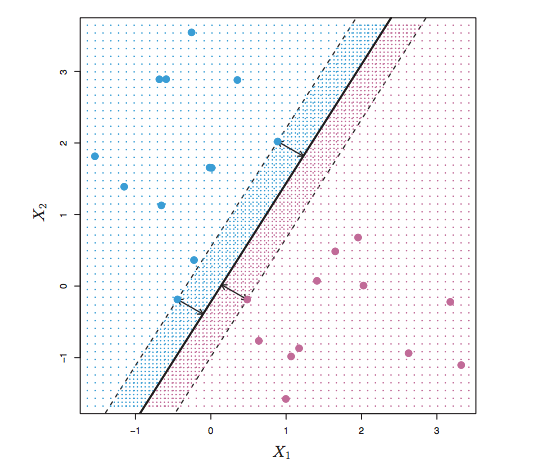
**<h4>FIGURA 9.3.</h4>** *Há duas classes de observações, mostradas em azul e em roxo. O hiperplano de margem máxima é mostrado como uma linha sólida. A margem é a distãncia da linha sólida para uma das linhas tracejadas. Os dois pontos azuis e o ponto roxo que localizam-se nas linhas tracejadas são os vetores de suporte, e a distância destes pontos ao hiperplano está indicada por setas. A grade roxa e azul indicam a regra de decisão feita por um classificador baseado neste hiperplano separador.*

A Figura 9.3 mostra o hiperplano de margem máxima no conjunto de dados da Figura 9.2. Comparando o painel á direita da Figura 9.2 à figura 9.3, vemos que o hiperplano de margem máxima mostrado em (9.3) de fato resulta em uma distância mínima maior entre as observações e o hiperplano separador - isto é, uma margem maior. De certa forma, o hiperplano de margem máxima representa a linha do meio da maior "placa" que podemos inserir entre as duas classes.
Examinando a Figura 9.3, vemos que três observações de teste estão equidistantes do hiperplano de margem máxima e se encontram ao longo das linhas tracejadas, indicando a largura da margem. Estas três observações são conhecidas como *vetores de suporte*, já que são vetores em um espaço $p-$dimensional (na Figura 9.3, p = 2), e eles "suportam" o hiperplano de margem máxima no sentido de que, se estes pontos fossem um pouco movidos, o hiperplano de margem máxima também se moveriam.  O interessante é que o hiperplano de margem máxima dependem diretamente dos vetores de suporte, mas não das outras observações: um movimento para qualquer uma das observações não afetaria o hiperplano separador, desde que o movimento da observação não cruze a fronteira colocada pela margem. O fato de que o hiperplano de margem máxima depende diretamente de apenas um pequeno subconjunto das observações é uma propriedade importante quando discutirmos o classificador de suporte e as máquinas de vetores de suporte.

## 9.1.4 Construção do Classificador de Margem Máxima

Agora consideramos a tarefa de construir o hiperplano de margem máxima baseado em um conjunto de $n$ observações de treino $x_{1},...,x_{n}$ $∈ℝ^{p}$ e legendas de classe associadas $y_{1},...,y_{n}$ $∈${-1,1}. Resumidamente, o hiperplano de margem máxima é a solução para o problema de otimização 


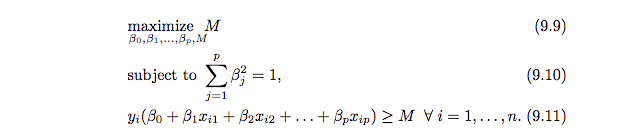

Este problema de otimização (9.9) - (9.11) é mais simples do que parece. Primeiramente, a restrição em (9.11) garante que cada observação estará no lado correto do hiperplano, dado que $M$ é positivo. (Na verdade, para que cada observação esteja no lado correto do hiperplano, precisaríamos apenas que $y_{i}$($β_{0}$ + $β_{1}$$x_{i1}$ + $β_{2}$$x_{i2}$ $+...+$ $β_{p}$$x_{ip}$) $>$ $0$. Logo, a restrição em (9.11) de fato erquer que cada observação esteja no lado correto do hiperplano, com algum amortecedor, visto que $M$ é positivo.)

Em seguida, note que (9.10) não é realmente uma restrição no hiperplano, visto que se $β_{0}$ + $β_{1}$$x_{i1}$ + $β_{2}$$x_{i2}$ $+...+$ $β_{p}$$x_{ip}$ $=0$ define um hiperplano, então $k$($β_{0}$ + $β_{1}$$x_{i1}$ + $β_{2}$$x_{i2}$ $+...+$ $β_{p}$$x_{ip}$) $=0$ para qualquer $k≠0$. No entanto, (9.10) adiciona significado à (9.11); pode-se mostrar que, com essa restrição, a distância perpendicular da i-ésima observação ao hiperplano é dada por

<h4 align="center"> $y_{i}$($β_{0}$ + $β_{1}$$x_{i1}$ + $β_{2}$$x_{i2}$ $+...+$ $β_{p}$$x_{ip}$)</h4>

Portanto, as restrições (9.10) e (9.11) asseguram que cada observação está no lado correto do hiperplano e a pelo menos uma distância $M$ do hiperplano. Então, $M$ representa a margem do nosso hiperplano, e o problema de otimização escolhe $β_{0}$,$β_{1}$,...,$β_{p}$ para maximizar $M$. Isto é exatamente a definição de hiperplano de margem máxima!

## 9.1.5. O caso não-separável

O classificador de margem máxima é uma forma bastante natural de realizar classificação, **se um hiperplano separador existir**. No entanto, como poderíamos imaginar, em muitos casos não existe hiperplano separador, e então não há classificador de margem máxima. Neste caso, o problema de otimização (9.9)-(9.11) não possui solução com $M>0$. Um exemplo é mostrado na Figura 9.4. Neste caso, não podemos separar *exatamente* as duas classes. No entanto, como veremos na próxima seção, podemos extender o conceito de um hiperplano separador com o objetivo de desenvolver um hiperplano que *quase* separa as classes, utilizando uma chamada *margem suave*. A generalização do classificador de margem máxima ao caso não-separável é conhecida como *classificador de vetor de suporte*.

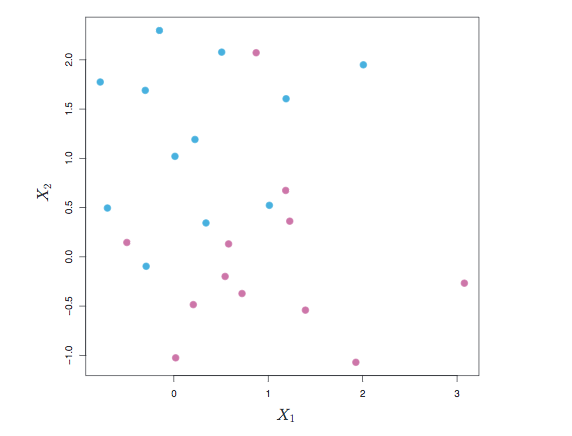
**<h4>FIGURA 9.4.</h4>** *Há duas classes de observações, mostradas em azul e roxo. Neste caso, as duas classes não são separáveis por um hiperplano, e então o classificador de margem máxima não pode ser utilizado.*

# 9.2 Classificadores de vetores de suporte

### 9.2.1 Visão geral do classificador de vetor de suporte

Na Figura 9.4, vemos que observações que pertencem a duas classes não são necessariamente separáveis por um hiperplano. De fato, mesmo se um hiperplano separador existir, haverá instâncias em que um classificador baseado em um hiperplano separador talvez possa não ser desejável. Um classificador baseado em um hiperplano separador necessariamente classificará todas as observações de treino; isto pode resultar em sensibilidade à observações individuais. Um exemplo é mostrado na Figura 9.5. A adição de uma única observação no painel à direita da Figura 9.5 leva a uma mudança dramática no hiperplano de margem máxima. O hiperplano de margem máxima não é satisfatório - por exemplo, possui uma margem muito pequena. Isto é problemático, pois como discutido é anteriormente, a distância de uma observação do hiperplano pode ser vista como uma medida da nossa confiança de que a observação foi corretamente classificada. Além disso, o fato de que o hiperplano de margem máxima é extremamente sensível a uma mudança em uma única observação sugere que ele pode sobreajustar os dados de treino. 

Neste caso, podemos desejar considerar um classificador baseado em um hiperplano que não separa perfeitamente as duas classes, podendo estar interessados em:

• Observações individuais mais robustas

• Melhor classificação da *maioria* das observações de treino.

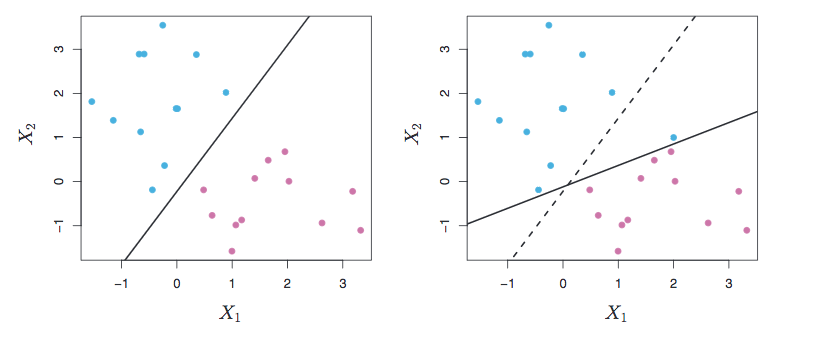
**<h4>FIGURA 9.5.</h4>** À esquerda: *Duas classes de observações são mostradas em azul e em roxo, juntamente com o hiperplano de margem máxima.* À direita: *Uma observação azul foi adicionada, levando a um deslocamento dramático no hiperplano de margem máxima, mostrado como uma linha sólida. A linha tracejada indica o hiperplano de margem máxima que foi obtido na ausência deste ponto adicional.*

Isto é, pode valer a pena classificar erroneamente algumas observações de treino para que seja feito um melhor trabalho na classificação das observações restantes. 

O *classificador de vetor de suporte*, às vezes chamado, de *classificador de margem suave*, faz exatamente isso. Em vez de procurar a maior margem possível tal que toda observação não está apenas no lado correto do hiperplano, mas também está no lado correto da margem, podemos permitir que algumas observações estejam no lado incorreto da margem, ou até mesmo no lado incorreto do plano. (A margem é *suave*, pois pode ser violada por algumas das observações de treino). Um exemplo é mostrado no painel à esquerda da Figura 9.6. A maioria das observações estão no lado correto da margem. No entanto, um pequeno subconjunto das observações estão no lado errado da margem.

Uma observação pode estar ao mesmo tempo no lado errado da margem e no lado errado do hiperplano. De fato, quando não há hiperplano separador, tal situação é inevitável. Observações no lado errado do hiperplano  correspondem às observações de treino que são classificadas erroneamente pelo classificador de vetor de suporte. O painel à direita da Figura 9.6 ilustra tal cenário.

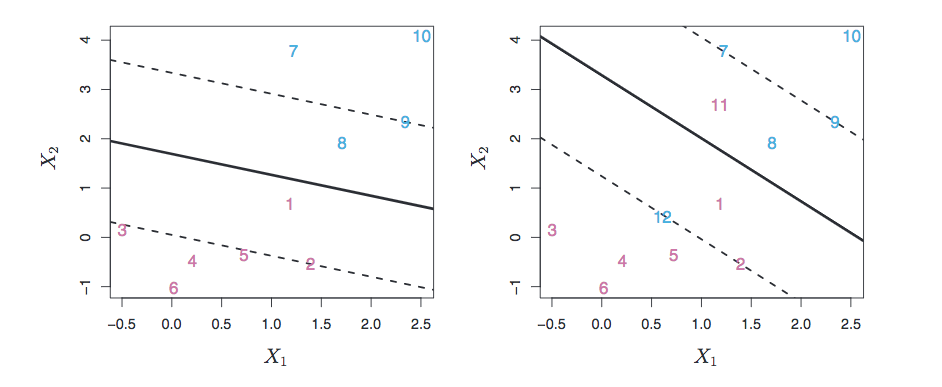
**<h4>FIGURA 9.6.</h4>** 
À esquerda: *Um classificador de vetor de suporte foi ajustado a um pequeno conjunto de dados. O hiperplano é mostrado como uma linha sólida e as margens são mostradas como linhas tracejadas.* Observações roxas: *As observações 3,4,5 e 6 estão no lado correto da margem, a observação 2 está em cima da margem, e a observação 1 está no lado errado da margem.* Observações azuis: *As observações 7 e 10 estão no lado correto da margem, a observação 9 está em cima da margem, e a observação 8 está no lado errado da margem. Não há observações no lado errado do hiperplano.* À direita: *É o mesmo painel à esquerda com dois pontos adicionais, 11 e 12. Estas duas observações estão no lado errado do hiperplano e no lado errado da margem.*

### 9.2.2 Detalhes do classificador de vetor de suporte

O classificador de vetor de suporte classifica uma observação de teste dependendo de qual lado de um hiperplano ela se encontra. O hiperplano é escolhido para separar corretamente a maioria das observações de treino entre as duas classes, mas pode classificar erroneamente algumas observações. É a solução para o problema de otimização

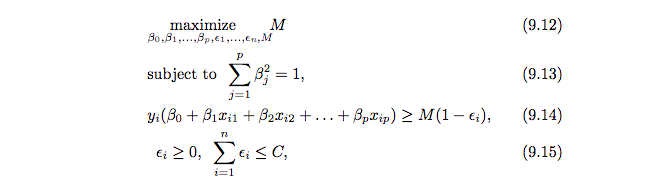

onde $C$ é um parâmetro de afinação não-negativo. Como em (9.11), $M$ é a largura da margem; procuramos fazer que este valor seja o maior possível. Em (9.14), $ε_{1}$,...,$ε_{n}$ são *variáveis de folga* que permitem que observações individuais estejam no lado errado da margem ou do hiperplano. Uma vez que resolvemos (9.12)-(9.15), classificamos uma observação de teste $x^{*}$ como antes, simplesmente determinando em qual lado do hiperplano ela se encontra. Isto é, classificamos a observação de teste baseada no sinal de $f(x^{*})$ = $β_{0}$ + $β_{1}$$x_{1}^{*}$ + $β_{2}$$x_{2}^{*}$ + ... +  $β_{p}$$x_{p}^{*}$.

O problema (9.12)-(9.15) parece complexo, mas insights em relação ao seu comportamento podem ser feitos por meio de uma séries de simples observações apresentadas abaixo. Primeiramente, a variável de folga $ε_{i}$ nos diz onde a i-ésima observação é localizada, relativo ao hiperplano e relativo à margem. Se $ε_{i}$ = 0 então a i-ésima observação está no lado correto da margem. Se $ε_{i}$ > 0 então a i-ésima observação está no lado errado da margem, e dizemos que a i-ésima observação violou a margem. Se $ε_{i}$ > 1 então ela está no lado errado do hiperplano.

Agora, consideramos o trabalho do parâmetro de afinação $C$. Em (9.15), $C$ é a soma dos $ε_{i}$'s, determinando o número e a gravidade das violações à margem (e ao hiperplano) que nós toleraremos. Podemos pensar em $C$ como um orçamento para o quanto a margem pode ser violada pelas $n$ observações. Se $C$ = 0 então não há orçamento para violações à margem, e deve ser o caso em que $ε_{1}$ = ... = $ε_{n}$ = 0. Neste caso, (9.12)-(9.15) simplesmente se torna o problema de otimização do hiperplano de margem máxima (9.9)-(9.11). (Obviamente, um hiperplano de margem maximal existe apenas se as duas classes são separáveis.) Para $C$ > 0 não mais que $C$ observações podem estar no lado errado do hiperplano, pois senão Σ$ε_{i}$ ≤ $C$. À medida que o orçamento $C$ aumenta, nos tornamos mais tolerantes às violações na margem, e com isso a margem se alargará. Analogamente, à medida que $C$ diminui, nos tornamos menos tolerantes às violações à margem e então a margem se estreita. Um exemplo é mostrado na Figura 9.7.

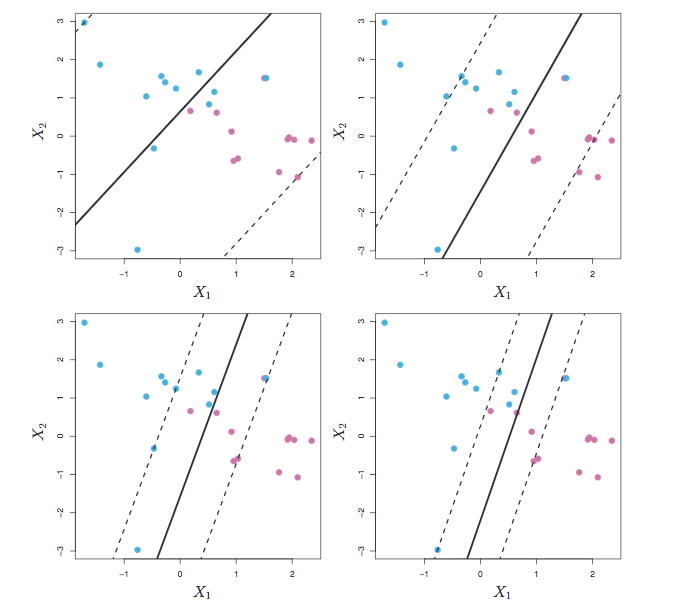

**<h4>FIGURA 9.7.</h4>** 
*Um classificador de vetor de suporte foi ajustado utilizando quatro valores diferentes do valor de afinação C em (9.12-9.15). O maior valor de C foi utilizado no painel de cima da esquerda, e valores menores foram utilizados nos outros painéis. Quando C é grande, há uma grande tolerância para observações que estão do lado errado da margem, e então a margem será grande. À medida que C diminui, a tolerância para observações que estão do lado errado da imagem diminui, e então a margem se estreita.*

Na prática, $C$ é tratado como um parâmetro de afinação que é geralmente escolhido por meio de validação cruzada. C controla o trade-off entre variância e polarização da técnica de aprendizado estatístico. Quando $C$ é pequeno, procuramos margens estreiras que são raramente violadas; isto leva a um classificador que é altamente ajustado aos dados, o qual pode haver baixa polarização, mas alta variância. Por outro lado, quando $C$ é maior, a margem é mais larga e permite maiores violações; isto leva à um ajuste menor e a obtenção de um classificador que possui potencialmente maior polarização e menor variância.

O problema de otimização (9.12)-(9.15) possui uma propriedade muito interessante: apenas observações que caem em cima da margem ou a violam afetarão o hiperplano, e consequentemente o classificador obtido. Em outras palavras, uma observação que se encontra estritamente no lado correto da margem não afeta o classificador de vetor de suporte. Mudar a posição desta observação não mudaria o classificador, visto que sua posição continuaria no lado correto da margem. Observações que caem diretamente em cima da margem, ou no lado errado da margem para sua classe, são conhecidos como *vetores de suporte*. Estas observações afetam de fato o classificador de vetor de suporte.

O fato de que apenas vetores de suporte afetam o classificador está em concordância com a afirmativa anterior de que $C$ controla o trade-off entre variância e polarização do classificador de vetor de suporte. Quando o parâmetro de afinação $C$ é grande, então a margem é larga, muitas observações violam a margem, e então há muitos vetores de suporte. Neste caso, muitas observações estão envolvidas em determinar o hiperplano. O painel de cima à esquerda possui baixa variância (já que muitas observações são vetores de suporte) mas potencialmente alta polarização. Em contraste, se $C$ for pequeno, então haverá menos vetores de suporte e então o classificador resultante terá baixa polarização mas alta variância. O painel de cima à esquerda ilustra esta situação, com apenas oito vetores de suporte.

O fato da regra de decisão do classificador de vetor de suporte ser baseada apenas em potencialmente um pequeno conjunto das observações de treino (os vetores de suporte) significa que isto é bem robusto para o comportamento de observações que estão longe do hiperplano. Esta propriedade é distinta de algum dos outros métodos de classificação que vimos anteriormente, tal como análise discriminante linear. 

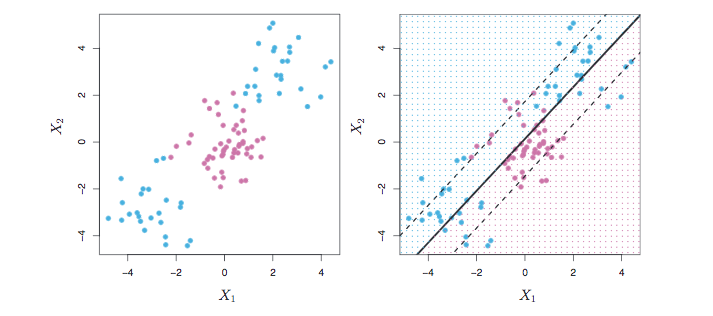
**<h4>FIGURA 9.8.</h4>** 
À esquerda: *As observações caem em duas classes, com uma fronteira não-linear entre elas.* À direita: *O classificador de vetor de suporte procura uma fronteira linear, e consequentemente tem uma performance ruim.*


# 9.3 Máquinas de vetores de suporte

Vamos primeiramente classificar um mecanismo geral para converter um classificador linear em um que produz fronteiras de decisão não-lineares. Então, introduziremos a máquina de vetor de suporte, que faz isto de forma automática.

## 9.3.1 Classificação com fronteiras de decisão não-lineares

O classificador de vetor de suporte é uma abordagem natural para classificação no contexto de duas classes, se a fronteira entre as duas classes for linear. No entanto, na prática podemos nos deparar com fronteiras de classe não-lineares. Poor exemplo, considere os dados no painel à esquerda da Figura 9.8. É claro que um classificador de vetor de suporte ou qualquer outro classificador linear terá um desempenho ruim. De fato, o classificador de vetor de suporte mostrado no painel à direita na Figura 9.8 é inútil neste caso.

No Capítulo 7, nos deparamos com uma situação análoga. Vimos que a performance da regressão linear pode ser afetada quando há uma relação não-linear entre os preditores e a saída. Neste caso, consideramos aumentar o espaço de recurso utilizando funções dos preditores, como termos quadráticos e cúbicos, de modo a incluir esta não-linearidade.

No caso do classificador de vetor de suporte, podemos resolver o problema de possíveis fronteiras não-lineares entre classes de uma forma similar, ao aumentar o espaço de recurso utilizando funções polinomiais dos preditores. Por exemplo, em vez de ajustar um classificador de vetor de suporte utilizando $p$ recursos

<h3 align="center"> $X_{1},X_{2},...,X_{p}$,</h3>

Então (9.12)-(9.15) se tornaria

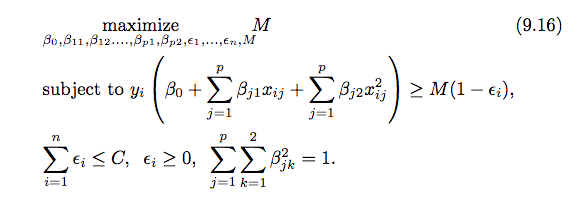

Por que isto nos leva a uma fronteira de decisão não-linear? No espaço de recurso mais largo, a fronteira de decisão que resulta de (9.16) é de fato linear. Mas, no espaço de recurso original, a fronteira de decisão é da forma $q(x) = 0$, onde $q$ é um polinômio quadrático, e suas soluções são geralmente não-lineares. Pode-se, além disso, deixar o espaço de recurso mais largo com termos polinomiais de ordens mais altas, ou termos de interação da forma $X_{j}$$X_{j'}$, para $j≠j'$.

Além disso, outras funções dos preditores além das polinomiais podem ser consideradas. É facil ver que há muitas formas possíveis de tornar o espaço de recurso mais largo, e ao menos que sejamos cuidadosos, podemos nos deparar com um número enorme de recursos. Daí, as computações se tornariam impossíveis de ser manejadas. A máquina de vetor de suporte, que apresentaremos em seguida, nos permite aumentar o espaço de recurso utilizado pelo classificador de vetor de suporte de forma que obtemos computações eficientes.

## 9.3.2 A máquina de vetor de suporte

A *máquina de vetor de suporte* (SVM) é uma extensão do classificador de vetor de suporte que resulta do "enlarguecimento" do espaço de recurso de uma forma específica, utilizando $núcleos$. A ideia principal é: queremos aumentar nosso espaço de recurso de forma a acomodar uma fronteira não-linear entre as classes. A abordagem do núcleo que descrevemos aqui é simplesmente uma abordagem computacional eficiente para realizar esta ideia.

Não foi discutido exatamente como o classificador de vetor de suporte é computado, pois os detalhes se tornam técnicos, de certa forma. No entanto, a solução para o problema do classificador de vetor de suporte (9.12)-(9.15) envolve apenas os *produtos internos* das observações. O produto interno dos dois $r$-vetores $a$ e $b$ é definido como $<a,b>$ = $Σ a_{i}b_{i}$. Daí, o produto interno das duas observações $x_{i}$,$x_{i'}$ é dado por

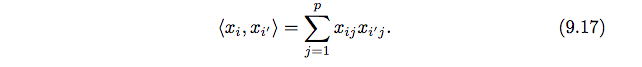

Pode ser mostrado que 
>O classificador de vetor de suporte linear pode ser representado como:

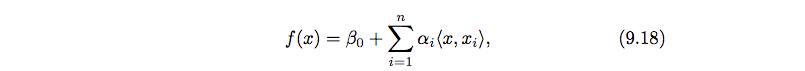
onde há $n$ parâmetros $α_{i}$, $i = 1,...,n$, um por observação de treino.

> Para estimar os parâmetros $α_{1}$,...,$α_{n}$ e $β_{0}$, precisamos dos ${n \choose 2}$ produtos internos $<x_{i},x_{i'}>$ entre todos os pares de observações de treino. 

Note que em (9.18), para que seja avaliada a função $f(x)$, precisamos computar o produto interno entre o novo ponto $x$ e cada um dos pontos de treino $x_{i}$. No entanto, $α_{1}$ é não-nulo apenas para os vetores de suporte na solução - isto é, se uma observação de treino não for um vetor de suporte, então seu $α_{i}$ é igual a zero. Então, se $S$ é a coleção de índices destes pontos de suporte, podemos reescrever qualquer função solução da forma (9.18) como

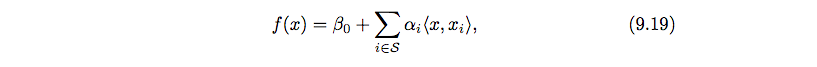

que tipicamente envolve menos termos que em (9.18).

Resumindo, ao representar o classificador linear $f(x)$, e ao computar seus coeficientes, só precisamos dos produtos internos.

Agora suponha que toda vez que o produto interno (9.17) apareça na representação (9.18), ou em um cálculo da solução do classificador de vetor de suporte, o substituímos com uma $generalização$ do produto interno da forma

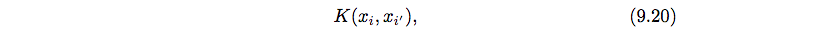

onde $K$ é alguma função que nos referiremos a ela como um $núcleo$. Um núcleo é uma função que quantifica a similaridade de duas observações. Por exemplo, podemos simplesmente utilizar

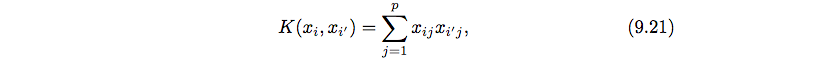

que nos devolveria o classificador de vetor de suporte. A equação 9.21 é conhecida como um núcleo $linear$, pois o classificador de vetor de suporte é linear nos recursos; o núcleo linear essencialmente quantifica a similaridade de um par de observações utilizando correlação (padrão) de Pearson. Mas poderíamos escolher, em vez disso, outra forma para (9.20). Por exemplo, poderia-se substituir toda instância de $Σ x_{ij}x_{i'j}$ pela quantidade

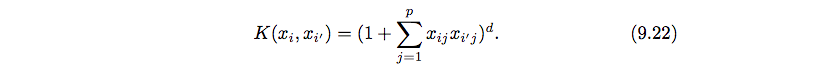

Isto é conhecido como um $núcleo$ $polinomial$ de grau $d$, onde $d$ é um inteiro positivo. Utilizar tal núcleo com $d$ > 1, em vez do núcleo linear padrão (9.21), algoritmo de classificador de vetor de suporte leva a uma fronteira de decisão bem mais flexível. Essencialmente, ele leva ao ajuste de um classificador de vetor de suporte em um espaço com maior dimensão, envolvendo polinômios de grau $d$, em vez do espaço de recurso original. Quando o classificador de vetor de suporte é combinado com um núcleo não-linear como (9.22), o classificador resultante é conhecido como máquina de vetor de suporte. Note que neste caso a função (não-linear) possui a forma

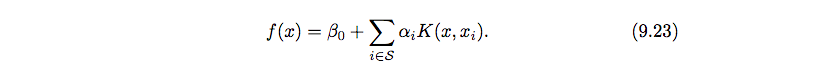

O painel à esquerda da figura 9.9 mostra um exemplo de uma máquina de vetor de suporte com um núcleo polinomial aplicado aos dados não-lineares da figura 9.8. O ajuste melhora substancialmente, se comparado ao classificador de vetor de suporte linear. Quando $d$ = 1, então o SVM (máquina de vetor de suporte) é reduizado ao classificador de vetor de suporte visto no começo do capítulo.

O kernel polinomial mostrado em (9.22) é um exemplo de um possível núcleo não-linear. Outra escolha popular é o $núcleo$ $radial$, que toma a forma

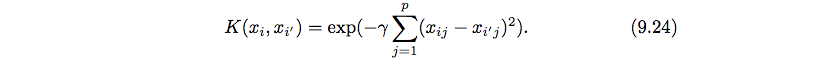

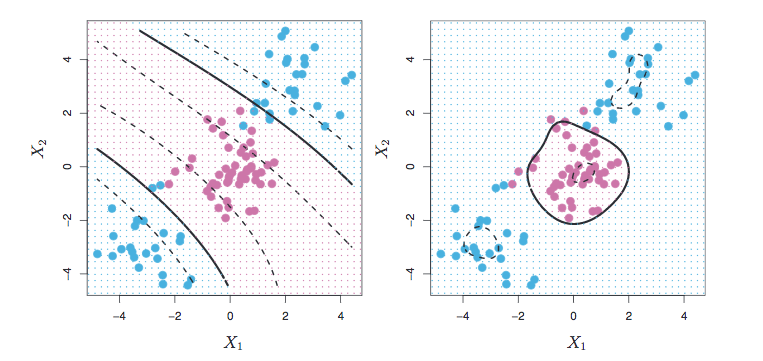
<h4>FIGURA 9.9.</h4>
À esquerda: *Um SVM com um núcleo polinomial de grau 3 é aplicado aos dados não-lineares da Figura 9.8, resultando em uma regra de decisão mais apropriada.* À direita: *Um SVM com um núcleo radial é aplicado. Neste exemplo, ambos os núcleos são capazes de captar a fronteira de decisão.*

Em (9.24), $γ$ é uma constante positiva. O painel à direita da Figura 9.9 mostra um exemplo de um SVM com um núcleo radial nestes dados não-lineares.

Como o núcleo radial (9.24) realmente funciona? Se uma dada observação de teste $x^{*}$ = $(x_{1}^{*}     ...  x_{p}^{*})^{T}$ está longe da observação de treino $x_{i}$ em ternos do espaço Euclidiano, então $Σ(x_{j}^{*}-x_{ij}^{*})^2$ terá um valor alto, e então $K(x_{i},x_{i'})$ = $exp$$(-γ$$Σ(x_{j}^{*}-x_{ij}^{*})^2)$ terá um valor muito baixo. Isto significa que em (9.23) $x_{i}$ virtualmente não terá importância em $f^{*}$. Relembre que a classificação da classe que foi prevista para a observação de teste $x^{*}$ é baseada no sinal de $f(x^{*})$. Em outras palarvas, observações de treino que estão longe de $x^{*}$ não terão papel importante na classificação de classe prevista para $x^{*}$. Isto significa que o núcleo radial possui um comportamento bastante $radial$, no sentido de que apenas observações de treino próximas possuem um efeito na classificação de classe de uma observação de teste. 

Qual a vantagem de utilizar um núcleo em vez de apenas aumentar o espaço de recurso utilizando funções de recursos originais, como em (9.16)? Uma vantagem é a computacional, e nos leva ao fato de que utilizando núcleos, precisamoso computar apenas $K(x_{i},x_{i'})$ para todos os ${n \choose 2}$ pares distintos $i$, $i'$. Isto é importante, pois em muitas aplicações de SVMs, o espaço de recurso aumentado é tão grande que as computações não são tratáveis. Para alguns núcleos, como o núcleo radial (9.24), o espaço de recurso é $implícito$ e dimensionalmente infinito, então não poderíamos computá-lo de qualquer forma.

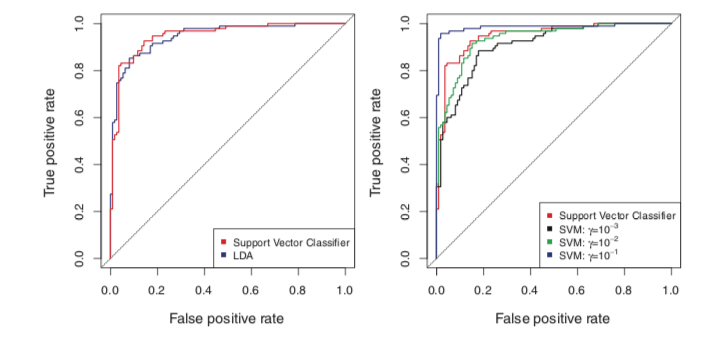
<h4>FIGURA 9.10.</h4>
*Curvas ROC para o conjunto de dados de treino $Heart$.* À esquerda: *O classificador de vetor de suporte e LDA são comparados*. À direita: *O classificador de vetor de suporte é comparado a um SVM utilizando um núcleo de base radial com $γ$ = $10^{-3}$, $10^{-2}$, e $10^{-1}$.*

## 9.3.3 Uma aplicação aos dados de Doenças Cardíacas

No Capítulo 8 aplicamos árvores de decisão e métodos relacionados aos dados $Heart$. O objetivo é utilizar 13 preditores tais como $Idade$, $Sexo$ e $Chol$ para prever se um indivíduo possui doenças cadíacas. Agora investigamos como um SVM se compara com LDA (análise linear discriminante). Após removermos 6 observações faltantes, os dados consistiam de 297 indivíduos, que dividimos aleatoriamente entre 207 de treino e 90 de teste.

Primeiramente, ajustamos LDA e o classificador de vetor de suporte aos dados de treino. Note que o classificador de vetor de suporte é equivalente a um SVM se utilizarmos um núcleo polinomial de grau d = 1. O painel à esquerda da Figura 9.10 mostra curvas ROC (descritas na Seção 4.4.3) para as predições dos dados de treino para ambos LDA e classificador de vetor de suporte. Ambos os classificadores computam escores da forma $\hat{f}$$(X)$ =  $\hat{β}_{0}$ + $\hat{β}_{1}$$X_{1}$ + $\hat{β}_{2}$$X_{2}$ $+...+$ $\hat{β}_{p}$$X_{p}$ para cada observação. Para qualquer atalho $t$, classificamos observações entre as categorias *doença cardíaca* e *sem doença cardíaca* dependendo se $\hat{f}$$(X)$ < $t$ ou $\hat{f}$$(X)$ $≥$ $t$. A curva ROC é obtida ao formar estas predições e ao computar as taxas de  falso positivo e os verdadeiro positivo para um intervalo de valores de $t$. Um classificador ótimo alcançará a extremidade acima à esquerda do gráfico ROC. Neste exemplo ambos a LDA e o classificador de vetor de suporte possuem boa performance, apesar de haver uma sugestão de que o classificador de vetor de suporte seja um pouco superior. 

O painel à direita da Figura 9.10 mostra curvas ROC para SVMs utilizando um kernel radial, com vários valores de $γ$. À medida que $γ$ aumenta e o ajuste se torna menos linear, as curvas ROC melhoram. $γ$ = $10^{-1}$ parece retornar uma curva ROC quase perfeita. No entanto, estas curvas representam taxas de erro de treino, que podem ser enganosas em termos da performance nos novos dados de teste. A figura 9.11 mostra curvas ROC computadas nas 90 observações de teste. Podemos observar algumas diferenças nas curvas ROC de treino. No painel à esquerda da Figura 9.11, o classificador de vetor de suporte parece ter uma pequena vantagem sobre o LDA (apesar destas diferenças não serem significantes estatisticamente). No painel à direita, o SVM utilizando $γ$ = $10^{-1}$, que mostrou os melhores resultados nos dados de treino, produz as piores estimativas nos dados de teste. Isto mostra mais uma vez que um método mais flexível frequentemente produzirá menores taxas de erro de treino, mas isto não necessariamente leva a uma melhor performance nos dados de teste. Os SVMS com $γ$ = $10^{-2}$ e $γ$ = $10^{-3}$ possuem performances comparáveis à do classificador de vetor de suporte, e todas possuem performance melhor que o SVM com $γ$ = $10^{-1}$.

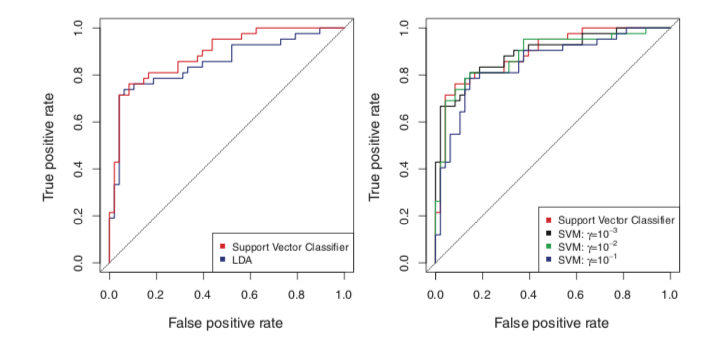

<h4>FIGURA 9.11.</h4>
*Curvas ROC para o conjunto de teste para os dados $Heart$.* À esquerda: *O classificador de vetor de suporte e LDA são comparados*. À direita: *O classificador de vetor de suporte é comparado a um SVM utilizando um núcleo de base radial com $γ$ = $10^{-3}$, $10^{-2}$, e $10^{-1}$.*

# 9.4 SVMs com mais de duas classes

Até agora, nossa discussão foi limitada ao caso da classificação binária: isto é, classificação no contexto de duas classes. Como podemos extender SVMs para um caso mais geral onde temos algum número de classes arbitrário? O conceito de hiperplanos separadores nos quais SVMs são baseadas não se extende naturalmente a mais de duas classes. Apesar de algumas propostas para a extensão de SMVs para um caso de K-classes terem sido feitas, as duas mais populares são as abordagens um-versus-um e a um-versus-todos. 

## 9.4.1 Classificação um-versus-um

Suponha que gostaríamos de realizar classificação utilizando SVMS, e há $K$ > 2 classes. Uma abordagem um-versus-um ou todos-os-pares constrói ${K \choose 2}$ SVMs, cada qual comparando um par de classes. Por exemplo, um SVM pode comparar a k-ésima classe, codificada como +1, à k'-ésima classe, codificada como -1. Classificamos uma observação de teste utilizando cada um dos ${K \choose 2}$ classificadores, e calculamos o número de vezes que a observação de teste é atribuída a cada uma das K classes. A classificação final é realizada ao atribuir a observação de teste à classe a qual foi mais frequentemente atribuída nestas classificações par a par ${K \choose 2}$.

## 9.4.2 Classificação um-versus-todos

A abordagem um-versus-todos é um procedimento alternativo para aplicar SVMs no caso de K > 2 classes. Ajustamos K SVMs, cada vez comparando uma das K classes às K-1 classes restantes. Seja $β_{0k}$,$β_{1k}$,...,$β_{pk}$ os parâmetros que resultam do ajuste de um SVM comparando a k-ésima classe (codificada como +1) às outras restantes (codificadas como -1). Seja $x^{*}$ uma observação de teste. Atribuímos a observação à classe para qual $β_{0k}$,$β_{1k}x_{1}^{*}$,...,$β_{pk}x_{p}^{*}$ é a maior, e isto leva a um grau alto de confiança que a observação de teste pertence a k-ésima classe.

# 9.5 Relação com Regressão Logística

Desde a introdução das SVMs, conexões profundas entre SVMs e outros métodos estatísticos clássicos emergiram. Pode-se reescrever (9.12)-(9.15) para o ajuste de $f(X)$ = $β_{0}$ + $β_{1}$$X_{1}$ + $β_{2}$$X_{2}$ $+...+$ $β_{p}$$X_{p}$ como 

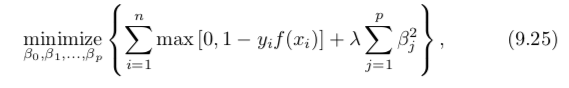

onde $λ$ é um parâmetro de afinação não-negativo. Quando $λ$ é grande então $β_{1}$,...,$β_{p}$ são pequenas, mais violações à margem são toleradas, e um teremos um classificador com baixa variância e alta polarização. Quando $λ$ é pequeno, então poucas violações à margem ocorrerão; isto leva a um classificador de alta variância mas baixa polarização. Então, um pequeno valor de $λ$ em (9.25) leva a um pequeno valor de $C$ em (9.15). O termo $λ$$Σ$$β_{j}^2$ possui um papel em controlar o trade-off entre polarização e variância.

Agora, (9.25) toma a seguinte forma de "Perda + Penalidade":

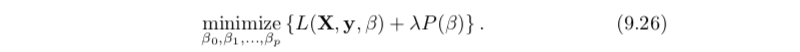

Em (9.26), $L$(**X**,**y**,$β$) é alguma função de perda quantificando a extensão para qual o modelo, parametrizado por $β$, ajusta os dados (**X**,**y**), e $P($β$)$ é uma função penalidade no vetor de parâmetro $β$ cujo efeito é controlado por um parâmetro de afinação não-negativo $λ$. No caso de (9.25), a função perda toma a forma

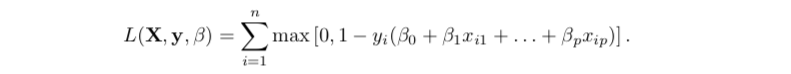

Isto é conhecido como *perda de toque*, e é retratado na figura 9.12. No entanto, a função de perda de toque mostra-se relacionada de forma próxima com a função de perda utilizada na regressão logística, também mostrada na figura 9.12.

Uma característicca importante do classificador de vetor de suporte é que apenas vetores de suporte possuem um papel no classificador obtido; observações no lado correto da margem não a afetam. Isto acontece devido ao fato de que a função de perda mostrada na Fgiura 9.12 é exatamente zero para observações para as quais $y_{i}$($β_{0}$ + $β_{1}$$X_{i1}$ + ... + $β_{p}$$X_{ip}$) $≥$ $1$; elas correspondem às observações que estão no lado correto da margem. Em contraste, a função de perda para regressão logística mostrada na Figura 9.12 não é exatamente zero em nenhum local. Mas, é muito pequena para observações que estão longe da fronteira de decisão. Devido às similaridades entre suas funções de perda, a regressão logística e o classificador de vetor de suporte frequentemente dão resultados bastante similares. Quando as classes são bem separadas, SVMs tendem a se comportar de forma melhor que a regressão logística; em regimes com sobreposição, a regressão logística é frequentemente preferida.

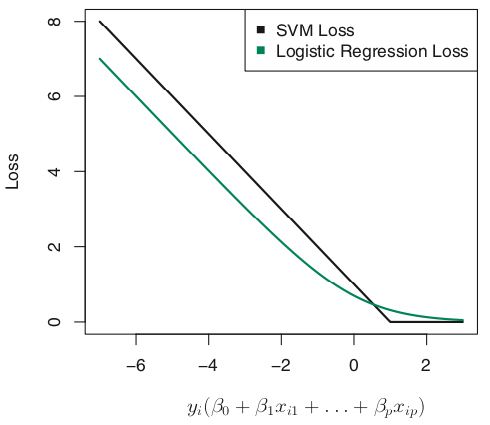
<h4>FIGURA 9.12.</h4> *As funções de perda do SVM e da regressão logística são comparadas, como função de $y_{i}$($β_{0}$ + $β_{1}$$X_{i1}$ + ... + $β_{p}$$X_{ip}$). Quando $y_{i}$($β_{0}$ + $β_{1}$$X_{i1}$ + ... + $β_{p}$$X_{ip}$) for maior que 1, então a perda do SVM é nula, já que isto corresponde a uma observação que está no lado correto da margem. Em geral, as duas funções de perda possuem comportamentos bem similares.*

Quando o classificador de vetor de suporte e SVM foram introduzidos, foi pensando que o parâmetro de afinação $C$ em (9.15) era um parâmetro sem importância e incômodo que poderia ser estabelecido como um valor padrão, como 1. No entanto, a formulação "Perda + Penalidade" (9.25) para o classificador de vetor de suporte indica que isto não é o caso. A escolha do parâmetro de afinação é muito importante e determina a extensão pra qual o modelo se subajusta ou sobreajusta aos dados, como mostrado na Figura 9.7.

Estabelecemos que o classificador de vetor de suporte é proximamente relacionado à regressão logística e a outros métodos estatísticos clássicos. Seria o SVM único no uso de núcleos para aumentar o espaço de recurso para que sejam acomodadas fronteiras de classe não-lineares? A resposta é **não**. Poderíamos realizar regressão logística ou muitos outros métodos de classificação utilizando núcleos não-lineares. No entanto, por razões históricas, o uso de núcleos não-lineares é melhor difundido no contexto de SVM. 

Apesar de não ser mostrado aqui, há uma extensão do SVM para regressão chamada *regressão de vetor de suporte*. No Capítulo 3, vimos que a regressão por mínimos quadrados procura coeficientes $β_{0}$,$β_{1}$,...,$β_{p}$ tais que a soma do resíduos elevados ao quadrado é a menor possível. A regressão por vetor de suporte procura coeficientes que minimizam um tipo diferente de perda, onde apenas resíduos maiores em valor absoluto que alguma constante positiva contribuem para a função de perda. Esta é uma extensão da margem utilizada em classificadores de vetor de suporte para o contexto da regressão.

___________________________________________________________________________________________________________________________________

# 9.6  Seção de Laboratório: Máquinas de Vetores de Suporte

## Classificador de Vetor de Suporte

Utilizaremos a biblioteca **scikit-learn** nesta seção de laboratório.

A função **sklearn.svm.SVC** pode ser utilizada para ajustar um classificador de vetor de suporte quando o argumento kernel = "linear" (núcleo linear) for usado. Um argumento **custo** nos permite especificar o custo de uma violação à margem. Quando o custo é pequeno, as margens serão maiores e muitos vetores de suporte estarão nela ou a violarão. Quando o custo é grande, as margem serão menores e existirão poucos vetores de suporte nela ou a violando.

Agora demonstraremos o uso desta função em um exemplo bidimensional,  para que possamos colocar em um gráfico a fronteira de decisão resultante. Começaremos gerando as observações, as quais pertencem a duas classes, e checaremos se as classes são linearmente separáveis ou não. 

In [2]:
import numpy as np
from sklearn import svm

In [3]:
np.random.seed(42) #makes the random numbers predictable

In [4]:
x = np.zeros([20,2])

In [5]:
lenght = len(x)

In [6]:
for i in range (0,20,1):
    for j in range (0,2,1):
        x[i][j] = np.random.randn(1) 

In [7]:
for i in range (9,20,1):
    for j in range (0,2,1):
        x[i][j] = x[i][j] + 1

In [8]:
y = np.repeat([1,-1], 10)

In [9]:
import matplotlib.pyplot as plt

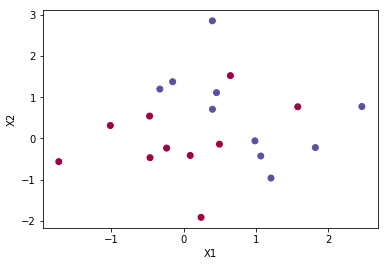

In [10]:
plt.scatter(x[:, 0], x[:, 1], c=(3-y), cmap='Spectral'); 
plt.xlabel('X1')
plt.ylabel('X2');

As classes não são linearmente separáveis. Em seguida, ajustaremos o classificador de vetor de suporte. 

In [11]:
clf = svm.SVC(kernel='linear',C=10)  #C-support vector classification

In [12]:
clf.fit(x,y) #training the model

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='|', s=100, linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

Agora, geraremos o gráfico do classificador de vetor de suporte obtido.

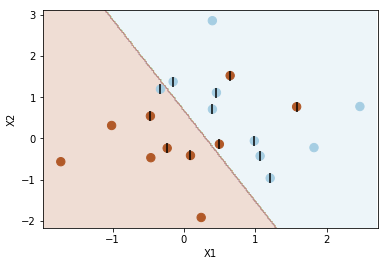

Number of support vectors:  13


In [14]:
plot_svc(clf, x, y)

A região do espaço de recurso que será atribuída à classe +1 é mostrada em azul, e a região que será atribuída à classe -1 é mostrada em vermelho. A fronteira de decisão entre as duas classes é linear (pois kernel = "linear). Note que aqui o segundo recurso é utilizado no eixo x e a primeira no eixo y, em contraste com o comportamento do gráfico normalmente utilizado em Python. Os vetores de suporte são colocados como círculos hachurados e as observações restantes são colocadas como círculos; aqui vemos que há 13 vetores de suporte.

E se usássemos um valor menor do parâmetro custo? 

In [15]:
clf2 = svm.SVC(kernel='linear',C=0.01)

clf2.fit(x,y)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

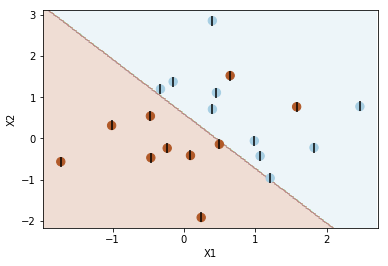

Number of support vectors:  20


In [16]:
plot_svc(clf2,x,y)

Agora que o parâmetro de custo é menor, obtemos um número maior de vetores de suporte, pois a margem é maior. 

Agora, vamos prever os rótulos das classes destas observações de teste.

In [17]:
import pandas as pd

dat = pd.DataFrame(x,y)

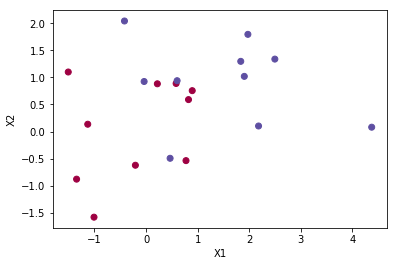

In [18]:

xtest = np.zeros([20,2])

for i in range (0,20,1):
    for j in range (0,2,1):
        xtest[i][j] = np.random.randn(1)
        
ytest = np.zeros([20])


for i in range(0,20,1):
    if(i<10):
        ytest[i] = -1
    else:
        ytest[i] = 1
        
for i in range (9,20,1):
    for j in range (0,2,1):
        xtest[i][j] = xtest[i][j] + 1

plt.scatter(xtest[:,0], xtest[:,1], c=ytest, cmap='Spectral')
plt.xlabel('X1')
plt.ylabel('X2');

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
ypred = clf.predict(xtest)
pd.DataFrame(confusion_matrix(ytest, ypred),index=clf.classes_, columns=clf.classes_)

,-1,1
-1,5,5
1,9,1


Agora, com o custo C = 10, apenas 6 das observações foram corretamente classificadas. 

In [21]:
ypred2 = clf2.predict(xtest)
pd.DataFrame(confusion_matrix(ytest, ypred2),index=clf2.classes_, columns=clf2.classes_)

,-1,1
-1,4,6
1,9,1


Com C = 0,01, uma observação adicional é classificada incorretamente. 

Agora considere uma situação na qual as duas classes são linearmente separáveis. Podemos então encontrar um hiperplano separador. Primeiramente, separamos as duas classes nos nossos dados simulados, tais que eles sejam linearmente separáveis.

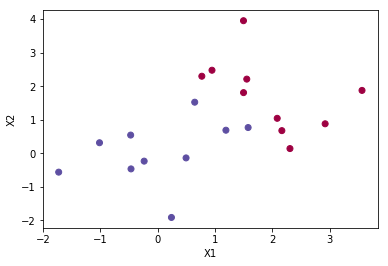

In [22]:
for i in range (9,20,1):
    for j in range (0,2,1):
        x[i][j] = x[i][j] + 1.1

plt.scatter(x[:,0], x[:,1], c=(y+5)/2, cmap='Spectral')
plt.xlabel('X1')
plt.ylabel('X2');

Agora as observações são separáveis. Ajustamos o classificador de vetor de suporte e traçamos o hiperplano separador, utilizando um valor muito alto de custo, tal que não haja observações classificadas de forma errada. 

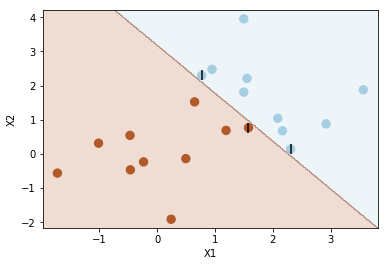

Number of support vectors:  3


In [23]:
clf4 = svm.SVC(kernel='linear',C=100000)
clf4.fit(x,y)
plot_svc(clf4,x,y)

Não obtivemos erros de treino e apenas três vetores de suporte foram utilizados. No entanto, a margem é muito pequena, e provavelmente este modelo terá uma performance ruim nos dados de teste. 

In [24]:
ypred4 = clf.predict(xtest)
pd.DataFrame(confusion_matrix(ytest, ypred4),index=clf4.classes_, columns=clf4.classes_)

,-1,1
-1,5,5
1,9,1


De fato, há uma performance ruim nos dados de testes. 

##  Máquina de Vetor de Suporte

Para ajustarmos um SVM utilizando um núcleo não-linear, utilizamos novamente a função **sklearn.svm.SVC**. No entanto, agora utilizaremos um parâmetro diferente para o núcleo (radial). Para ajustarmos um SVM com núcleo radial utilizamos  To fit a SVM with a radial kernel we use *kernel = 'radial'* e o argumento *gammma* para especificar um valor de $γ$ para o núcleo radial.

Primeiramente, geraremos dados com uma fronteira de classes não-linear:

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
np.random.seed(42)

In [27]:
x1= np.zeros([200,2])

In [28]:
for i in range (0,200,1):
    for j in range(0,2,1):
        x1[i][j] = np.random.randn(1)

In [29]:
for i in range (0,100,1):
    for j in range (0,2,1):
        x1[i][j] = x1[i][j] + 2 

In [30]:
for i in range (100,150,1):
    for j in range (0,2,1):
        x1[i][j] = x1[i][j] - 2  

In [31]:
y1 = np.concatenate([np.repeat(-1, 150), np.repeat(1,50)])   

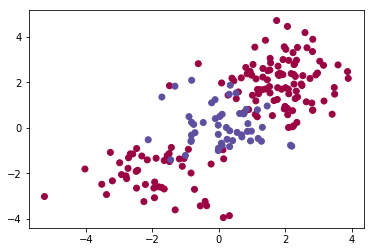

In [32]:
plt.scatter(x1[:, 0], x1[:, 1], c=y1, cmap='Spectral'); 

Observando o gráfico com os dados, torna-se claro que a fronteira é não-linear. 

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.5, random_state=2)

Os dados são aleatoriamente separados entre grupos de treino e de teste. Então, ajustamos os dados de treino utilizando a função sklearn.svm.SVC com um kernel radial e $γ$ =1:

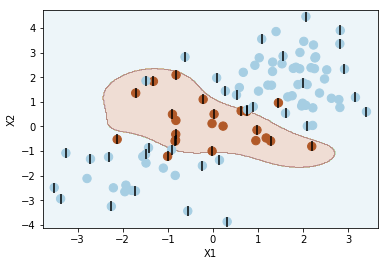

Number of support vectors:  50


In [34]:
svmfit = svm.SVC(C=1.0, kernel='rbf', gamma=1)
svmfit.fit(X_train, y_train)

plot_svc(svmfit,X_train,y_train)

O gráfico acima demonstra que a SVM resultante possui uma fronteira não-linear. 

Podemos observar que há muitos erros de treino neste ajuste. Se aumentarmos o valor do custo, podemos reduzir o número de erros. No entanto, isto vem com o preço de uma fronteira de decisão mais irregular, o que traz o risco de haver um sobreajuste nos dados.

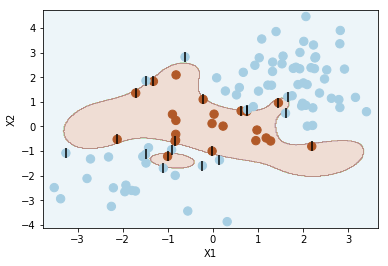

Number of support vectors:  22


In [35]:
svmfit2 = svm.SVC(C=100000, kernel='rbf', gamma=1)
svmfit2.fit(X_train, y_train)

plot_svc(svmfit2,X_train,y_train)

## Curvas ROC

De skearn.metrics.roc_curve podemos produzir curvas ROC.

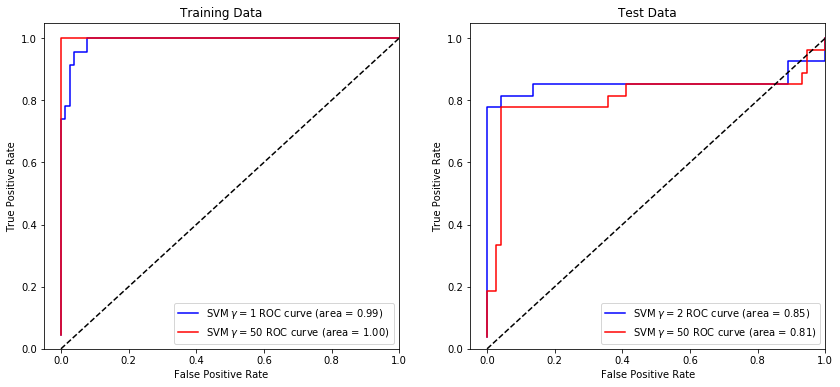

In [54]:
from sklearn.metrics import roc_curve, auc

svm3 = svm.SVC(C=1, kernel='rbf', gamma=2)
svm3.fit(X_train,y_train)

svm4 = svm.SVC(C=1, kernel='rbf', gamma=50)
svm4.fit(X_train,y_train)

y_train_score3 = svm3.decision_function(X_train)
y_train_score4 = svm4.decision_function(X_train)

false_pos_rate3, true_pos_rate3, _ = roc_curve(y_train, y_train_score3)
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)

false_pos_rate4, true_pos_rate4, _ = roc_curve(y_train, y_train_score4)
roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,6))
ax1.plot(false_pos_rate3, true_pos_rate3, label='SVM $\gamma = 1$ ROC curve (area = %0.2f)' % roc_auc3, color='b')
ax1.plot(false_pos_rate4, true_pos_rate4, label='SVM $\gamma = 50$ ROC curve (area = %0.2f)' % roc_auc4, color='r')
ax1.set_title('Training Data')

y_test_score3 = svm3.decision_function(X_test)
y_test_score4 = svm4.decision_function(X_test)

false_pos_rate3, true_pos_rate3, _ = roc_curve(y_test, y_test_score3)
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)

false_pos_rate4, true_pos_rate4, _ = roc_curve(y_test, y_test_score4)
roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

ax2.plot(false_pos_rate3, true_pos_rate3, label='SVM $\gamma = 2$ ROC curve (area = %0.2f)' % roc_auc3, color='b')
ax2.plot(false_pos_rate4, true_pos_rate4, label='SVM $\gamma = 50$ ROC curve (area = %0.2f)' % roc_auc4, color='r')
ax2.set_title('Test Data')

for ax in fig.axes:
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([-0.05, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc="lower right")

Para os dados de treino, vemos que o SVM produziu predições acuradas. Ao aumentarmos o valor de gamma, produzimos um ajuste mais flexível e geramos melhorias na acurácia. 
<br></br>
<br></br>
No entanto, estas curvas ROC estão todas nos dados de treino. Estamos mais interessados no nível de acurácia de predição nos dados de teste, e vemos que a performance do SVM neste caso é menor, e que o valor de gamma igual a 2 produz melhores resultados.

## Máquinas de Vetores de Suporte com Múltiplas Classes 

Se a resposta for um fator contendo mais de duas classes, então a função realizará classificação multiclasse utilizando a abordagem um-versus-um. Exploraremos este contexto ao gerar uma terceira classe de observações. 

In [36]:
np.random.seed(42)

In [37]:
xx = np.zeros([50,2])

for i in range (0,50,1):
    for j in range(0,2,1):
        xx[i][j] = np.random.randn(1)


xxx = np.concatenate([x,xx])

In [38]:
yy = np.repeat(0,50)
yyy = np.concatenate([y,yy])

xxx[yyy==0] = xxx[yyy==0] + 4

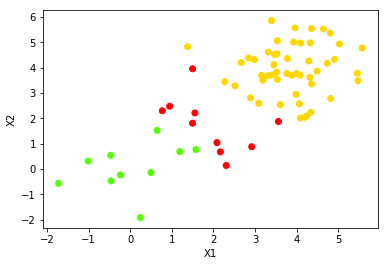

In [39]:
plt.scatter(xxx[:, 0], xxx[:, 1], c=yyy, cmap='prism'); 
plt.xlabel('X1')
plt.ylabel('X2');

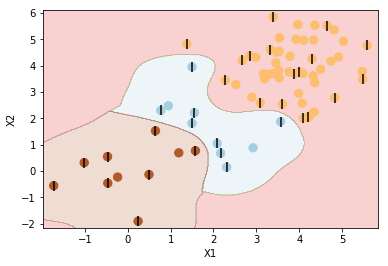

Number of support vectors:  33


In [40]:
svmmult = svm.SVC(C=10, kernel='rbf', gamma=1)
svmmult.fit(xxx, yyy)

plot_svc(svmmult,xxx,yyy)

## Aplicação aos Dados de Expressão Gênica

Agora examinaremos o conjunto de dados **Khan**, que consiste em um número de amostras de tecido correspondentes a quatro tipos distintos de células cancerosas. Para cada amostra de tecido, medidas de expressão gênica estão disponíveis. O conjunto de dada consiste em dados de treino, *d_xtrain* and *d_ytrain*, e dados de teste, *d_xtest* and *d_ytest*. 

In [41]:
%%capture
d_xtrain = pd.read_csv('Khan_xtrain.csv',index_col=0)

d_ytrain = pd.read_csv('Khan_ytrain.csv',index_col=0)

d_xtest = pd.read_csv('Khan_xtest.csv',index_col=0)

d_ytest = pd.read_csv('Khan_ytest.csv',index_col=0)

In [42]:
d_ytrain.iloc[:, 0].value_counts(sort=False)

1     8
2    23
3    12
4    20
Name: x, dtype: int64

In [43]:
d_ytest.iloc[:, 0].value_counts(sort=False)

1    3
2    6
3    6
4    5
Name: x, dtype: int64

In [44]:
d_xtrain.shape
d_xtest.shape

(20, 2308)

Este conjunto de dadoss consiste em medidas de expressão para 2308 genes. Os dados de treino e de teste consistem em 63 e 20 observações respectivamente. 

Utilizaremos uma abordagem de vetor de suporte para prever os subtipos de câncer utilizando medidas de expressão gênica. Neste conjunto de dados, há um valor alto de recursos relativo ao número de observações. Isso sugere que deveríamos utilizar um núcleo linear, pois a flexibilidade adicional de um núcleo polinominal ou radial é desnecessária. 

In [45]:
genfit = svm.SVC(C=10, kernel='linear')

In [46]:
genfit.fit(d_xtrain,d_ytrain.iloc[:, 0])

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [47]:
d_ypred = genfit.predict(d_xtrain)

In [48]:
pd.DataFrame(confusion_matrix(d_ytrain,d_ypred),index=genfit.classes_, columns=genfit.classes_)

,1,2,3,4
1,8,0,0,0
2,0,23,0,0
3,0,0,12,0
4,0,0,0,20


Observamos que não há erros de treino. De fato, isto não é supreendente, pois o grande número de variáveis relativo ao número de observações implica que é fácil encontrar hiperplanos que separam as classes completamente. Mas, não estamos tão interessados na performance do classificador de vetor de suporte nas observações de treino, e sim nas performance das observações de teste. 

In [49]:
d_ypred2 = genfit.predict(d_xtest)

In [50]:
pd.DataFrame(confusion_matrix(d_ytest,d_ypred2),index=genfit.classes_, columns=genfit.classes_)

,1,2,3,4
1,3,0,0,0
2,0,6,0,0
3,0,2,4,0
4,0,0,0,5


Vemos que a utilização do custo C = 10 nos leva cometer a dois erros no conjunto de dados de teste. 